# 12. Perceptron

In [1]:
# Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Importing iris dataset
df = pd.read_csv('iris-1.csv', header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# 12-1
# select the first 100 rows with only the first 2 features (petal length & width)
# X=[[first feature value of 1st data  &  second feature value of 1st data] […..]]
X = df.iloc[:100, [0, 1]].values 

# y=[target values]
# y value is -1 if target=setosa, y=-1, otherwise 1
y = np.where(df.iloc[:100, -1] == 'Iris-setosa', -1, 1)
 
# Printing the first 5 contents of X and y
print(f'The first 5 contents of X:\n', X[0:5], '\n')
print(f'The first 5 contents of y:\n', y[0:5], '\n')

The first 5 contents of X:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]] 

The first 5 contents of y:
 [-1 -1 -1 -1 -1] 



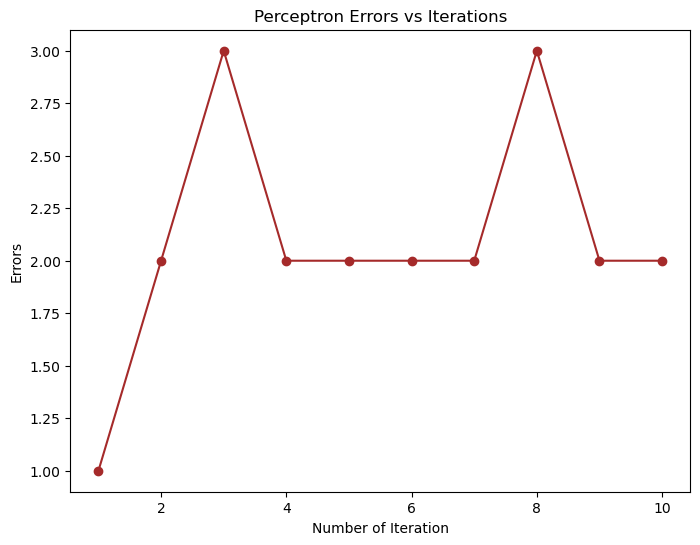

In [3]:
class Perceptron():
    def __init__(self, lrate=0.1, no_iter=50):
        self.lrate = lrate
        self.no_iter = no_iter
      
    def fit(self, X, y):      
        # initialze weights ww to random value (-1,1)
        self.ww = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights
        # initilize list_error=[]
        # keeps track of the errors per iteration for graph plotting
        self.list_errors = []   

        #iterate over labelled dataset updating weights for each features accordingly
        for _ in range(self.no_iter):
            cur_error = 0
            
            # 12-2
            for xx, label in zip(X, y):
                output = self.predict(xx)
                delta = self.lrate * (label-output)
                
                if delta != 0:
                    self.ww[1:] = self.ww[1:] + (delta*xx)  
                    self.ww[0] = self.ww[0] + delta
                    cur_error = (cur_error + 1)

            # Append current iteration's error (cur_error)
            self.list_errors.append(cur_error)
               
        return self

    #compute the net input i.e sum of X and the weights plus the bias value
    def net_input(self, X):
        return np.dot(X, self.ww[1:]) + self.ww[0]
    
    #12-3 
    #predict a classification for a sample of features X
    def predict(self, X):     
        return np.where(self.net_input(X) > 0, 1, -1)
        
model = Perceptron(no_iter=10) 
model.fit(X, y)

#12-3
# Plot errors against number of iterations using list_errors
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(model.list_errors) + 1), model.list_errors, marker='o', color='brown')
plt.xlabel('Number of Iteration')
plt.ylabel('Errors')
plt.title('Perceptron Errors vs Iterations')
plt.show()

# 13. Backpropagation

In [4]:
def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    
    return hidden_output, output_output

# 13-1
# Sigmoid Activation Fuction
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#13-2
# Sigmoid Derivative
def sigmoid_derivative(x): 
    sig = sigmoid(x)
    return sig*(1 - sig)

#13-3
X = np.array([[1, 1, 0], [1, 0, 0], [1, 0, 1], [0, 0, 1]])
Y = np.array([[0], [1], [1], [0]])

input_nodes = 3 # I have changed the input nodes value as per instruction

# Construct a Neural Network
# number of nodes in each layer
hidden_nodes = 2 
output_nodes = 1 

# Randomly initialize weights and biases between (0,1)
# hidden_weights: weights connecting input layer nodes to hidden layer nodes
# output_weights: weights connecting hidden layer nodes to output node

hidden_weights = np.random.uniform(size=(input_nodes, hidden_nodes))
output_weights = np.random.uniform(size=(hidden_nodes, output_nodes))

# Learning rate. You can change this
lrate = 0.1

# Number of iteration. You can change this
no_iter = 10000

# Backpropagation training
for iter in range(no_iter):
    
    # forward step
    # hidden_output: outputs of hidden layer nodes
    # output_output: output of output layer node
    hidden_output, output_output = forward(X)
    
    # Compute error
    error = Y - output_output

In [5]:
# Backpropagation

# 13-4 Output layer
delta_output = error * sigmoid_derivative(output_output)
output_weights = output_weights + lrate * hidden_output.T.dot(delta_output)


#13-5 Hidden Layer
delta_hidden = delta_output.dot(output_weights.T) * sigmoid_derivative(hidden_output)
hidden_weights = hidden_weights + lrate * X.T.dot(delta_hidden)


# Print error every 100 iter for monitoring
if iter % 100 == 0:
    print(f"Epoch {iter} Error is {np.mean(np.abs(error))}")
    
# predict using training data
_, nn_output = forward(X)
print(nn_output)


[[0.65141445]
 [0.62711797]
 [0.65485262]
 [0.6456929 ]]


Delta output has been calculated using the error at the output layer and the derivation of the sigmoid function. On the other side, Delta hidden layer conputes the error propagation back to the hidden layer. The weights has been updated by learing rate lrate and the calculated deltas.

In [6]:
# 14 (two output nodes)
output_nodes = 2  

# Updating the target value Y which will represnt two output nodes
Y = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Randomly initialize output weights with the correct shape for two output nodes
output_weights = np.random.uniform(size=(hidden_nodes, output_nodes))

# Backpropagation training with two output nodes
for iter in range(no_iter):

    hidden_output, output_output = forward(X)
    error = Y - output_output # Computing Error

    # Backpropagation for output layer
    delta_output = error * sigmoid_derivative(output_output)
    output_weights = output_weights + (lrate * hidden_output.T.dot(delta_output))

    # Backpropagation for hidden layer
    delta_hidden = delta_output.dot(output_weights.T) * sigmoid_derivative(hidden_output)
    hidden_weights = hidden_weights + (lrate * X.T.dot(delta_hidden))

    # Print error every 100 iter for monitoring
    if iter % 100 == 0:
        print(f"Epoch {iter} Error is {np.mean(np.abs(error))}")

# predict using training data
_, nn_output = forward(X)
print(nn_output)

Epoch 0 Error is 0.503562355546614
Epoch 100 Error is 0.49726888698514166
Epoch 200 Error is 0.4952311397729379
Epoch 300 Error is 0.4918527845031387
Epoch 400 Error is 0.48525333376441604
Epoch 500 Error is 0.47221388081901877
Epoch 600 Error is 0.4508804756670407
Epoch 700 Error is 0.42530829879452536
Epoch 800 Error is 0.3996496301387217
Epoch 900 Error is 0.3761818108982823
Epoch 1000 Error is 0.35659578019730864
Epoch 1100 Error is 0.34042161352697914
Epoch 1200 Error is 0.32628756334762
Epoch 1300 Error is 0.3135237851544903
Epoch 1400 Error is 0.30216449219539676
Epoch 1500 Error is 0.2923653170767183
Epoch 1600 Error is 0.28412901344395813
Epoch 1700 Error is 0.2773098923529621
Epoch 1800 Error is 0.27169168877061284
Epoch 1900 Error is 0.2670511987444706
Epoch 2000 Error is 0.2631917810301547
Epoch 2100 Error is 0.25995400066017826
Epoch 2200 Error is 0.25721393300264495
Epoch 2300 Error is 0.2548767388916561
Epoch 2400 Error is 0.25286963453965766
Epoch 2500 Error is 0.251135

I have updated the target value for Y to represent two output nodes which is 0 and 1 and altered the output node from '1' to '2' for the backpropagation for the 14th question. By adjusting the weights of the output and hidden layers to correspond with the determined deltas, this code completes the backpropagation process.

In [7]:
#Done